# Research Notebook 1
## Nikka Pakhomova
## Date: January 12th-19th 2026

# 1: Experience 

- Wrote a code for Gastaldello et al.'s <font color=blue>[1]</font> data:
  - Plotted radius vs. temperature of 4 different systems (N5044, N1550, A262 and N2563), separating Chandra and XMM data.
  - Then, performed a curve fit using a Smoothly Joined Power Law function for each plot, obtaining the best fitting values.
- Attended the weekly group meeting to discuss curve fitting results and next steps for the data analysis.

## Motivation:

The motivation behind curve fitting the radius vs temperature plot was to find the best curve fitting method out of the three models used in Gastaldello et al.'s paper. They used Smoothly Joined Power Law, Power Laws mediated by an exponential, and a RiseFall model <font color=blue>[1]</font>. Different participants of our group used different models and compared results to find the best one.
The best fitting model can later be used on a different data set for our research.

# 2: What? (What happened?)

Using the following fitting curve model (Smoothly joined power law)<font color=blue>[1]</font>:

$T(r)= {[(\frac{1}{t_1(r)})^{s}+(\frac{1}{t_2(r)})^{s}]}^{\frac{-1}{s}}$

$t_i(r)=T_{i,100}(\frac{r}{100kpc})^{p_i} \quad$ for i=1,2


I wrote a code for plotting radius vs temperature and the corresponding curve fit. 
Here's one example for one system (N5044). This code first calculates the radius R (since we are given R1 and R2) and the corresponding error for the radius. Then, it separates Chandra and XMM data. Then I defined the curve fitting function and using curve_fit, we print the optimal values for T1, p1, T2, and p2. We leave s fixed at s=5. Finaly we plot the data as a scatter plot and the corresponding fit curve.
```
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

data = pd.read_csv("Xray ellipitical data - n5044 (1).csv")
data['R (kpc)'] = 0.5 * (data['R1 (kpc)'] + data['R2 (kpc)'])
data['Error R (kpc)'] = 0.5 * (data['R2 (kpc)'] - data['R1 (kpc)'])

# Divide data into two datasets
chandra_data = data[ data['Source'] == 'Chandra']
xmm_data = data[ data['Source'] == 'XMM']

r0 = 10.0
s_fixed = 5

def power_law(r, T1_100, p1, T2_100, p2, s):
    r = np.asarray(r, dtype=float)
    t1 = T1_100 * (r/100)**p1
    t2 = T2_100 * (r/100)**p2
    return 1/(((1/t1)**s+(1/t2)**s)**(1/s))

def model4(r, T1, p1, T2, p2):
    return power_law(r, T1, p1, T2, p2, s_fixed)

# initial guesses
p0 = [2.0, 0.50, 1.325, -0.475]  # T1, p1, T2, p2

optimal, _ = curve_fit(model4, xmm_data["R (kpc)"], xmm_data["Temp (keV)"], sigma=xmm_data["Error Temp (keV)"], absolute_sigma=True, p0=p0)
r_grid = np.linspace(xmm_data['R (kpc)'].min(), xmm_data['R (kpc)'].max(), 500)
T_fit = model4(r_grid, *optimal) 

print("Best-fit (s fixed =", s_fixed, ")")
print(f"T1 = {optimal[0]:.4f}")
print(f"p1 = {optimal[1]:.4f}")
print(f"T2 = {optimal[2]:.4f}")
print(f"p2 = {optimal[3]:.4f}")

plt.figure()
plt.scatter(xmm_data['R (kpc)'],xmm_data['Temp (keV)'])
plt.errorbar(xmm_data['R (kpc)'], xmm_data['Temp (keV)'], xerr=xmm_data['Error R (kpc)'], yerr=xmm_data['Error Temp (keV)'], fmt='o')
plt.xlabel('R (kpc)')
plt.ylabel('Temp (keV)')
plt.title("XMM n5044")
plt.plot(r_grid, T_fit)
plt.show()
```

Then the process was repeated for 4 different systems (N5044, N1550, A262 and N2563), and for each system Chandra and XMM data were plotted separately.

# 3: So what? (What does it mean?)

Here's the obtained plot for the example, with the corresponding fitted values:

Best-fit: __(s=5), T1 = 1.3967, p1 = 0.2278, T2 = 1.3502, p2 = -0.5522__

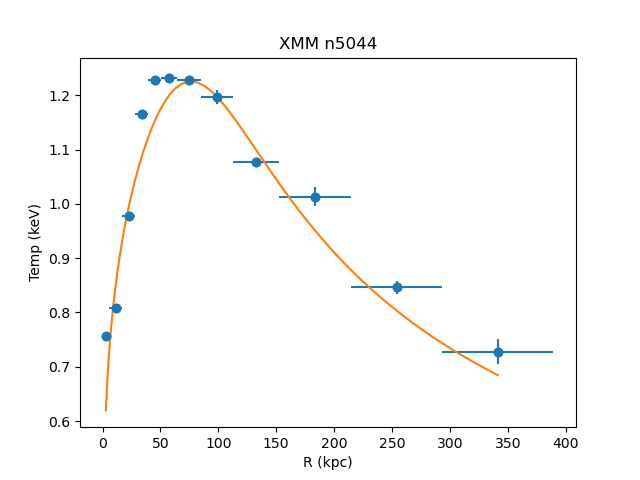 

_Figure 1: Plot of radius vs temperature and a Smoothly joined power law curve fit for the system N5044 (XMM's data only)_

The results of the different plots for each system were mostly successful. First we compared our individual plots to the ones on the original paper <font color=blue>[1]</font>, and then we compared them with each other's plots on today's meeting. We concluded that the three fitting models work well. The $\chi^{2}$ value for each plot dependThis means that (for now) we won't need to use Markov Chain Monte Carlo (MCMC) methods for our future research.  

# 4. Now what? (What's next?)
## Plan for the next week

The goal for the week was achieved, however my colleagues had a more complete python code for the three different fitting models. 

Therefore the tasks for next week were divided. Two of my colleagues are implementing the 3 fitting models on a different data set (from Humphrey et al. <font color=blue>[2]</font>) and choosing which one fits better. 
Whereas the other member of the group and I, are calculating the baryonic mass of Gastaldello et al.'s data set <font color=blue>[1]</font> for different systems by using the Hernquist profile <font color=blue>[3]</font>. 

If we manage to do that, we will then write a code to use the jeans model (from Bautista et al.'s paper <font color=blue>[4]</font>) and plot the density profile including the baryonic mass previously calculated. 

# 5. Bibliography

1. Gastaldello, F., Buote, D. A., Humphrey, P. J., Zappacosta, L., Bullock, J. S., Brighenti, F., & Mathews, W. G. (2007). *Probing the dark matter and gas fraction in relaxed galaxy groups with X-ray observations from Chandra and XMM-Newton.* The Astrophysical Journal. https://arxiv.org/pdf/astro-ph/0610134

2. Humphrey, P. J., Buote, D. A., Gastaldello, F., Zappacosta, L., Bullock, J. S., Brighenti, F., & Mathews, W. G. (2006). A Chandra view of dark matter in early-type galaxies. The Astrophysical Journal. https://arxiv.org/pdf/astro-ph/0601301

3. Hernquist, L., *An Analytical Model for Spherical Galaxies and Bulges*, The Astrophysical Journal, https://ui.adsabs.harvard.edu/link_gateway/1990ApJ...356..359H/ADS_PDF

4. Bautista, Y. F., Robertson, A., Sagunski, L., Smith-Orlik, A., & Tulin, S. (2025). *Jeans model for the shapes of self-interacting dark matter halos.* arXiv:2511.10765. https://arxiv.org/abs/2511.10765